In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np

# torch.manual_seed(1)

EPOCH = 2
LR = 0.001
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)

print(train_data.train_data.shape)

train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.train_labels
print(train_x.shape)

test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.test_labels[:2000]

torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [2]:
import matplotlib.pyplot as plt

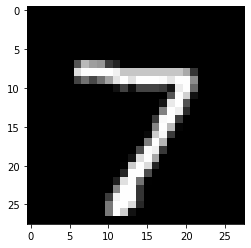

In [3]:
plt.imshow(test_x[0,0,:,:].numpy(), 'gray')

In [4]:
loss_func = nn.CrossEntropyLoss()

In [5]:
import torch.nn.functional as F

In [6]:
target = torch.tensor([0,7,9]) # 标签 这里还有一个torch.tensor与torch.Tensor的知识点https://blog.csdn.net/weixin_40607008/article/details/107348254
one_hot = F.one_hot(target).float() 
print(one_hot)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])


In [7]:
target = torch.randn(3, 5).softmax(dim=1)
print(target)

tensor([[0.2420, 0.1149, 0.4348, 0.1167, 0.0916],
        [0.1313, 0.1455, 0.1806, 0.3453, 0.1974],
        [0.1238, 0.0683, 0.6074, 0.0370, 0.1634]])


In [8]:
target = torch.randn(3, 5)
print(target)

tensor([[-0.8849, -1.2578,  0.5270, -1.3696,  0.3979],
        [-0.3529, -0.9244,  2.3283,  2.2804,  1.0028],
        [ 0.5993, -1.5926, -1.0962, -0.4543, -1.2278]])


In [9]:
print(target.softmax(dim=1))

tensor([[0.0998, 0.0688, 0.4097, 0.0615, 0.3601],
        [0.0294, 0.0166, 0.4299, 0.4098, 0.1142],
        [0.5541, 0.0619, 0.1017, 0.1932, 0.0891]])


In [10]:
print(target.softmax(dim=0))

tensor([[0.1406, 0.3214, 0.1378, 0.0238, 0.3303],
        [0.2393, 0.4486, 0.8350, 0.9167, 0.6047],
        [0.6201, 0.2300, 0.0272, 0.0595, 0.0650]])


In [11]:
import pdb

In [17]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        self.conv1 = nn.Conv2d(1,16,kernel_size=(3,3),stride = (1,1),padding = 1)
        self.relu1 = nn.ReLU(inplace = True)
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2,stride = 2)
        self.conv2 = nn.Conv2d(16,32,kernel_size=(3,3),stride = (1,1),padding = 1)
        self.relu2 = nn.ReLU(inplace = True)
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2,stride = 2)
        
        self.fc1 = nn.Linear(7*7*32,256)
        self.relu3 = nn.ReLU(inplace = True)
        self.fc2 = nn.Linear(256,10)
      


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        output = x
        return output


fc = FC()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
#         pdb.set_trace()

        output = fc(b_x)
    
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.3068 | test accuracy: 0.191
Epoch:  0 | train loss: 0.7662 | test accuracy: 0.821
Epoch:  0 | train loss: 0.3963 | test accuracy: 0.887
Epoch:  0 | train loss: 0.1821 | test accuracy: 0.906
Epoch:  0 | train loss: 0.1534 | test accuracy: 0.913
Epoch:  0 | train loss: 0.0572 | test accuracy: 0.946
Epoch:  0 | train loss: 0.2439 | test accuracy: 0.948
Epoch:  0 | train loss: 0.1579 | test accuracy: 0.943
Epoch:  1 | train loss: 0.1594 | test accuracy: 0.961
Epoch:  1 | train loss: 0.2206 | test accuracy: 0.956
Epoch:  1 | train loss: 0.2899 | test accuracy: 0.960
Epoch:  1 | train loss: 0.0593 | test accuracy: 0.947
Epoch:  1 | train loss: 0.0355 | test accuracy: 0.967
Epoch:  1 | train loss: 0.0345 | test accuracy: 0.965
Epoch:  1 | train loss: 0.0125 | test accuracy: 0.967
Epoch:  1 | train loss: 0.1015 | test accuracy: 0.964
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [13]:
test_output = fc(test_x[:9])

NameError: name 'fc' is not defined

In [14]:
test_output.shape

torch.Size([9, 10])

In [15]:
test_output[1,:]

tensor([  0.1374,  -1.1088,   6.8014,   1.2917, -14.7977,   0.3533,   0.5753,
        -12.6558,   0.1862, -11.4444], grad_fn=<SliceBackward0>)

In [16]:
test_y[:9]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [17]:
torch.max(test_output, 1)[1].data.squeeze()

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6])

In [18]:
 print(torch.sum(torch.max(test_output, 1)[1]==test_y[:9]))
    

tensor(8)


In [19]:
torch.max(test_output, 1)[1]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6])

In [20]:
test_y[:9]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [21]:
test_output

tensor([[ -1.6332,  -9.2839,   0.4506,   2.6029,  -7.7975,  -1.9897, -11.2092,
           7.6098,  -2.8647,   0.0835],
        [  0.1374,  -1.1088,   6.8014,   1.2917, -14.7977,   0.3533,   0.5753,
         -12.6558,   0.1862, -11.4444],
        [ -4.8220,   4.0255,  -1.0115,  -1.5616,  -2.5110,  -2.8193,  -2.5506,
          -1.8831,  -1.3019,  -3.8617],
        [  8.2122, -10.2473,  -1.6679,  -4.4729,  -8.7041,  -2.0870,  -0.7570,
          -2.4470,  -4.7472,  -0.0846],
        [ -3.1157,  -6.5497,  -2.0212,  -4.6825,   6.8161,  -2.5964,  -1.3875,
          -1.7472,  -1.9650,   3.2117],
        [ -6.3968,   4.8004,  -2.1375,  -1.7501,  -3.5612,  -4.8342,  -5.9143,
          -0.9102,  -1.8486,  -3.7527],
        [ -7.1541,  -6.4555,  -6.6072,  -1.7827,   7.0369,  -0.1679,  -4.1803,
          -1.5532,   1.6719,   2.0273],
        [ -7.8256,  -4.1093,  -3.2933,  -0.9402,   1.7917,  -1.1765,  -4.2677,
          -3.0557,  -1.6018,   5.2327],
        [ -0.6461,  -6.7891,   0.8743,  -7.9794,

In [22]:
test_output = fc(test_x[:1])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

tensor(7) prediction number
tensor([7]) real number


In [23]:
test_output

tensor([[ -1.6332,  -9.2839,   0.4506,   2.6029,  -7.7975,  -1.9897, -11.2092,
           7.6098,  -2.8647,   0.0835]], grad_fn=<AddmmBackward0>)

In [24]:
test_x[:1].shape

torch.Size([1, 1, 28, 28])

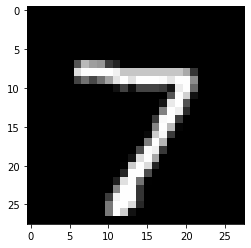

In [25]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')